In [2]:
### TASK-1 ###
### SHIPMENTS OF HOUSEHOLD APPLIANCES: LINE GRAPHS ###
#The dataset, appliance shipments, contains a series of quarterly shipments (in millions of dollars) of US household appliances between 1985 and 1989

Quarter      object
Shipments     int64
dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

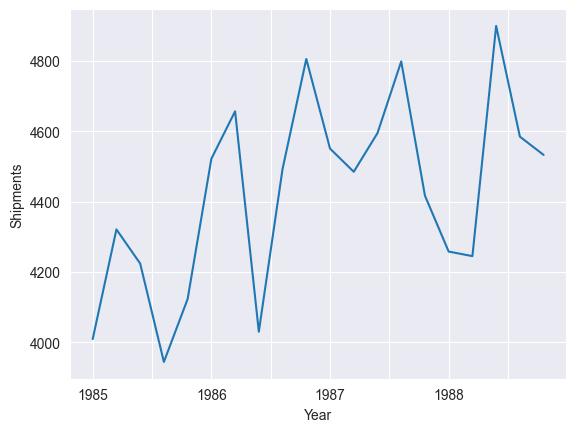

In [3]:
#Create a well formatted time plot of the data#

import os
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
#import required datasets
shipments_df = pd.read_csv('../../.venv/lib/Datasets/ApplianceShipments.csv', index_col=False, usecols=[0,1]) #only use first and second columns

#Begin to explore columns for names
shipments_df.head()

#Split Quarter from year
print(shipments_df.dtypes)
shipments_df[['Quarter', 'Year']] = shipments_df['Quarter'].str.split('-', expand=True)
shipments_df.head()
#Time Plot
shipments_df.plot(x='Year', y='Shipments', legend=False)
plt.xlabel('Year')
plt.ylabel('Shipments')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

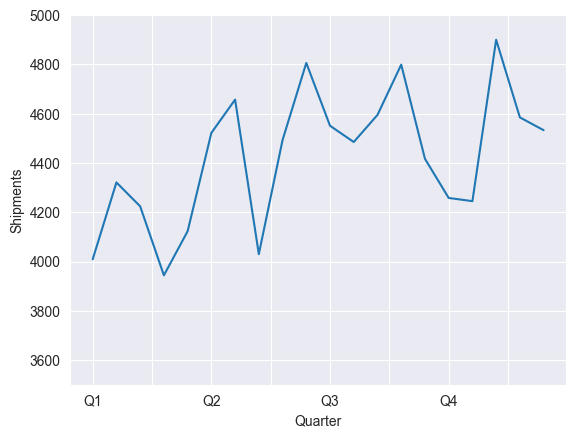

In [4]:
#Does there appear to be a quarterly pattern? For a closer view of the patterns, zoom in to the range of 3500-5000 on the y-axis
#Time Plot using quarter on x-axis and focusing on 3500-5000 on x-axis
shipments_df.plot(x='Quarter', y='Shipments', ylim=[3500,5000], legend=False)
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

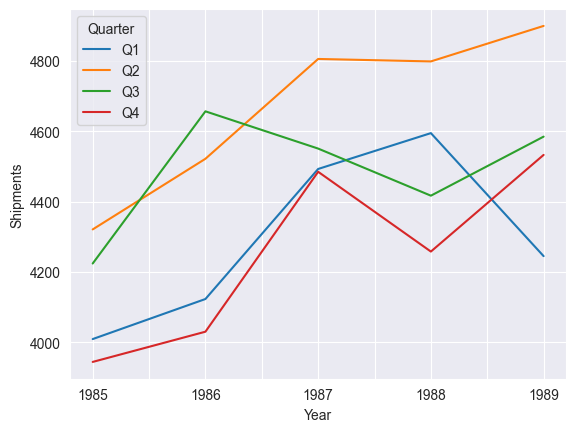

In [5]:
#Create one chart with four seperate lines that represent the quarters and zoom in on the range, 3500-5000
#Time Plot

#pivot data so each quarter as a seperate column of shipments
df_pivot = shipments_df.pivot(index='Year', columns='Quarter', values='Shipments')
df_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Shipments')
plt.show

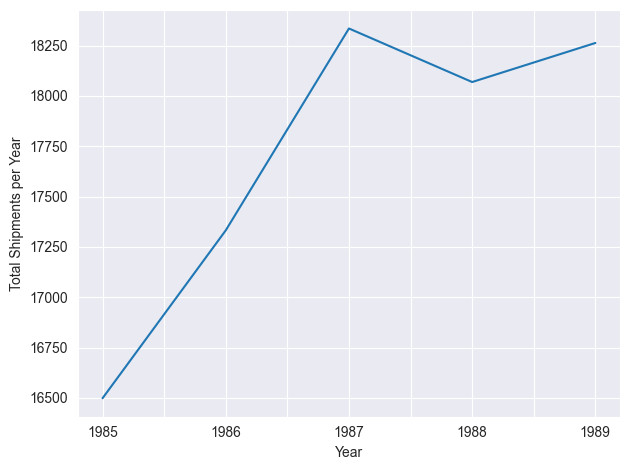

In [6]:
#Create a line graph of the series at a yearly aggregated level (total shipments per year)

#change Year column to datetime index
byYear = shipments_df['Shipments'].groupby(shipments_df['Year']).sum()
ax = byYear.plot(legend=False)
ax.set_xlabel('Year'); ax.set_ylabel('Total Shipments per Year')
plt.tight_layout(); plt.show()

In [7]:
### TASK-2 ###
### SALES OF RIDING MOWERS: SCATTER PLOTS ###
#Riding mower manufacturer wants to identify best sales prospects. Classify households as prospective owners or nonowners on the basis of income (in 000s) and lot size (in 1000 ft^2). Looking at a sample of 24 households.


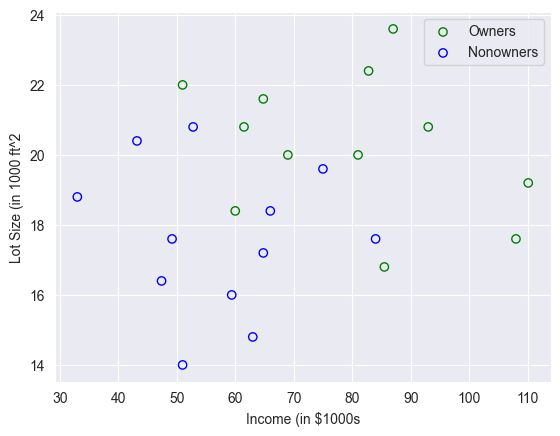

In [8]:
#Create a scatter plot of Lot size vs. income, color coded by the outcome variable (owner/non-owner). Create legible labels and legend, etc.

#Load dataset
mowers_df = pd.read_csv('../../.venv/lib/Datasets/RidingMowers.csv', index_col=False)

#Create scatterplot
_, ax = plt.subplots()
for ownershipValue, color in ('Owner', 'green'), ('Nonowner', 'blue'):
    subset_df = mowers_df[mowers_df.Ownership == ownershipValue]
    ax.scatter(subset_df.Income, subset_df.Lot_Size, color='none', edgecolor=color)
ax.set_xlabel('Income (in $1000s'); ax.set_ylabel('Lot Size (in 1000 ft^2')
ax.legend(["Owners", "Nonowners"])
plt.show()

In [9]:
### Task-3 ###
### Laptop Sales at a London Computer Chain: Barcharts and Boxplots ###
# Data is all sales at a computer chain in london in January 2008


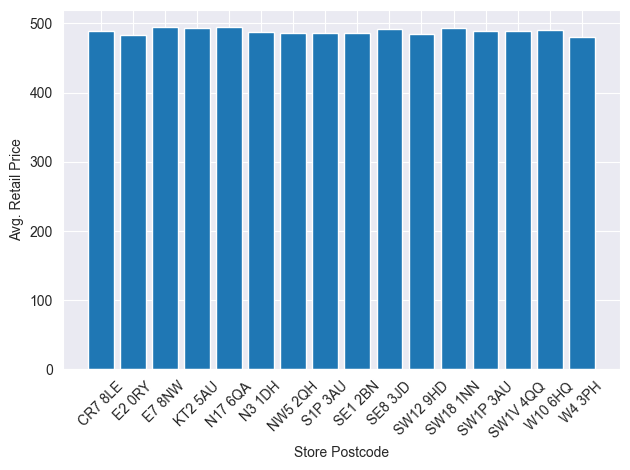

In [20]:
#Create bar chart of average retail price by store. Which store has the highest average, which has the lowest?

#Load dataset
jan2008sales_df = pd.read_csv('../../.venv/lib/Datasets/LaptopSalesJanuary2008.csv', index_col=False)
#Plot barchart
dataforp = jan2008sales_df['Retail Price'].groupby(jan2008sales_df['Store Postcode']).mean()
fig, ax = plt.subplots()
ax.bar(dataforp.index, dataforp)
ax.set_xlabel('Store Postcode')
ax.set_ylabel('Avg. Retail Price')
plt.xticks(rotation=45, ha='center')
plt.tight_layout(); plt.show()

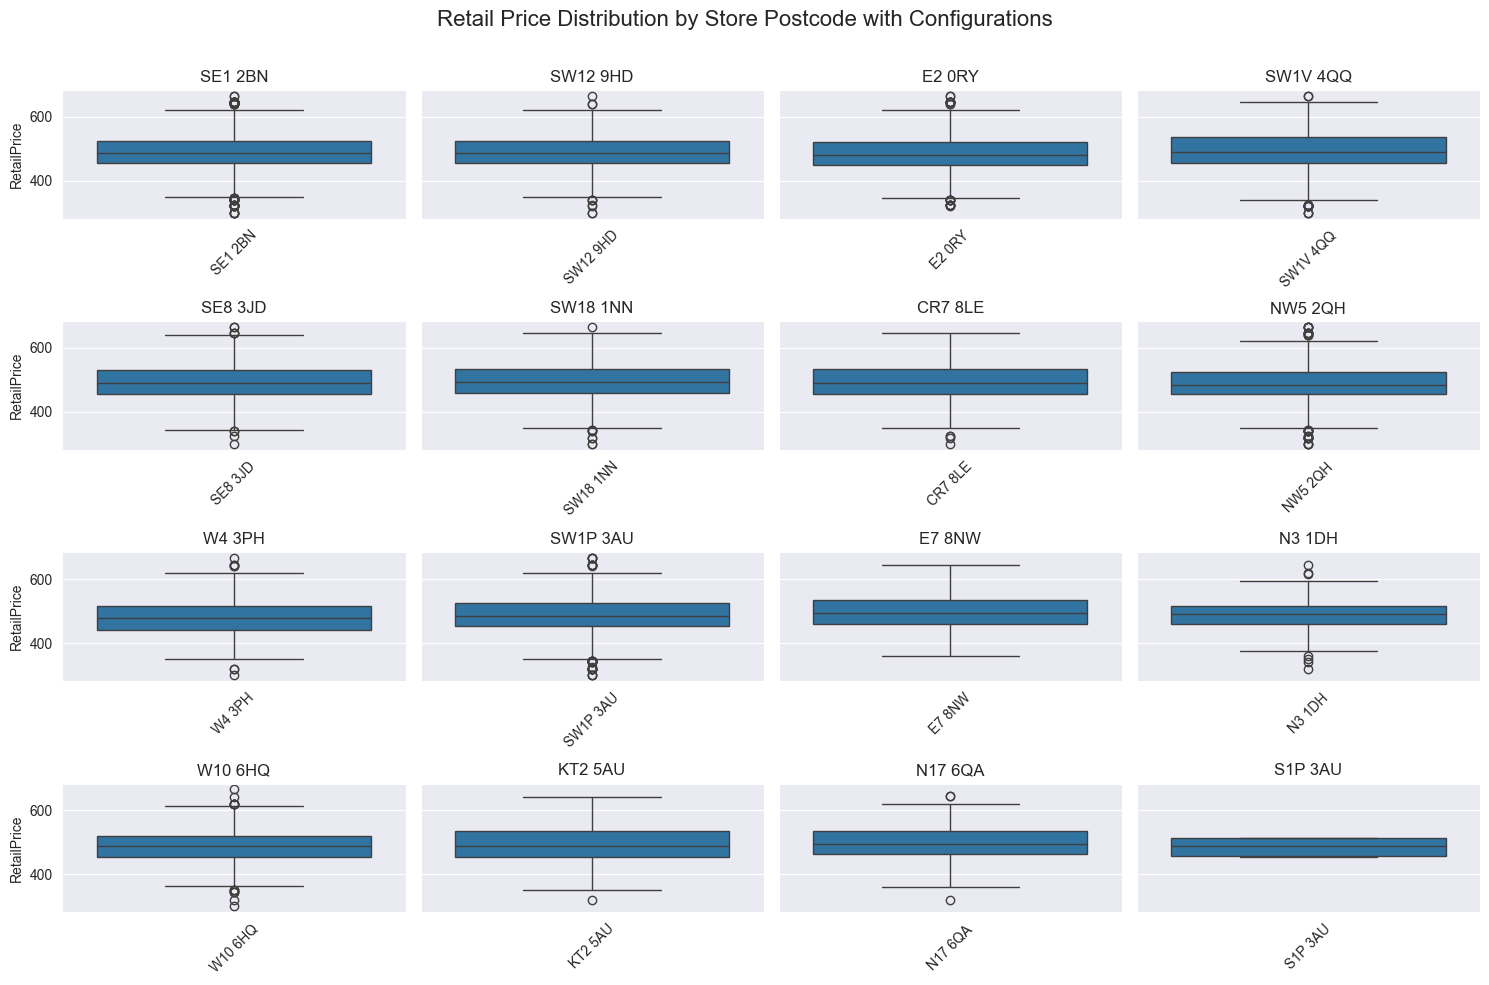

In [45]:
#Compare retail prices across, create side=-by-side boxplots of retail by store & compare

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Fix column names
jan2008sales_df.columns = [col.replace(' ', '') for col in jan2008sales_df.columns]

unique_postcodes = jan2008sales_df['StorePostcode'].unique()
n_postcodes = len(unique_postcodes)
n_rows = 4
n_cols = math.ceil(n_postcodes / n_rows)

#Create a dataframe of variables needed
sales_plot_df = jan2008sales_df[['RetailPrice', 'StorePostcode','Configuration']]
#Side-By-Side Boxplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,10), sharey=True)
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create side-by-side boxplots for each unique StorePostcode
unique_postcodes = jan2008sales_df['StorePostcode'].unique()
for idx, postcode in enumerate(unique_postcodes):
    # Filter data for the current postcode

    df_subset = jan2008sales_df[jan2008sales_df['StorePostcode'] == postcode]

    # Create boxplot
    sns.boxplot(x='StorePostcode', y='RetailPrice', data=df_subset, ax=axes[idx])

    # Set title for each subplot
    axes[idx].set_title(postcode)
    axes[idx].set_xlabel('')  # Remove x-label to avoid clutter
    if idx % n_cols != 0:  # Remove y-label for all but the first column
        axes[idx].set_ylabel('')

    # Rotate x-axis labels if needed (though with one postcode per plot, this is minimal)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots
for idx in range(n_postcodes, len(axes)):
    fig.delaxes(axes[idx])

# Add overall title and adjust layout
plt.suptitle('Retail Price Distribution by Store Postcode with Configurations', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top to fit the suptitle

# Display the plot
plt.show()